📥 Notebook: Umgang mit fehlenden Werten

In [1]:
# Setup
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

# Daten einlesen
base_url = "https://raw.githubusercontent.com/opencampus-sh/einfuehrung-in-data-science-und-ml/main/"
df_umsatz = pd.read_csv(base_url + "umsatzdaten_gekuerzt.csv")
df_wetter = pd.read_csv(base_url + "wetter.csv")
df_kiwo = pd.read_csv(base_url + "kiwo.csv")

# Datum & Mergen
df_umsatz['Datum'] = pd.to_datetime(df_umsatz['Datum'])
df_wetter['Datum'] = pd.to_datetime(df_wetter['Datum'])
df_kiwo['Datum'] = pd.to_datetime(df_kiwo['Datum'])

df = df_umsatz.merge(df_wetter, on='Datum', how='left')
df = df.merge(df_kiwo, on='Datum', how='left')
df['KielerWoche'] = df['KielerWoche'].fillna(0).astype(int)
df['Wochentag'] = df['Datum'].dt.dayofweek
df['Monat'] = df['Datum'].dt.month
df['IstWochenende'] = df['Wochentag'].isin([5, 6]).astype(int)

In [2]:
# Fehlende Werte analysieren
(df.isnull().sum() / len(df)).sort_values(ascending=False)

Wettercode             0.249089
Bewoelkung             0.007499
Temperatur             0.001714
Windgeschwindigkeit    0.001714
id                     0.000000
Datum                  0.000000
Warengruppe            0.000000
Umsatz                 0.000000
KielerWoche            0.000000
Wochentag              0.000000
Monat                  0.000000
IstWochenende          0.000000
dtype: float64

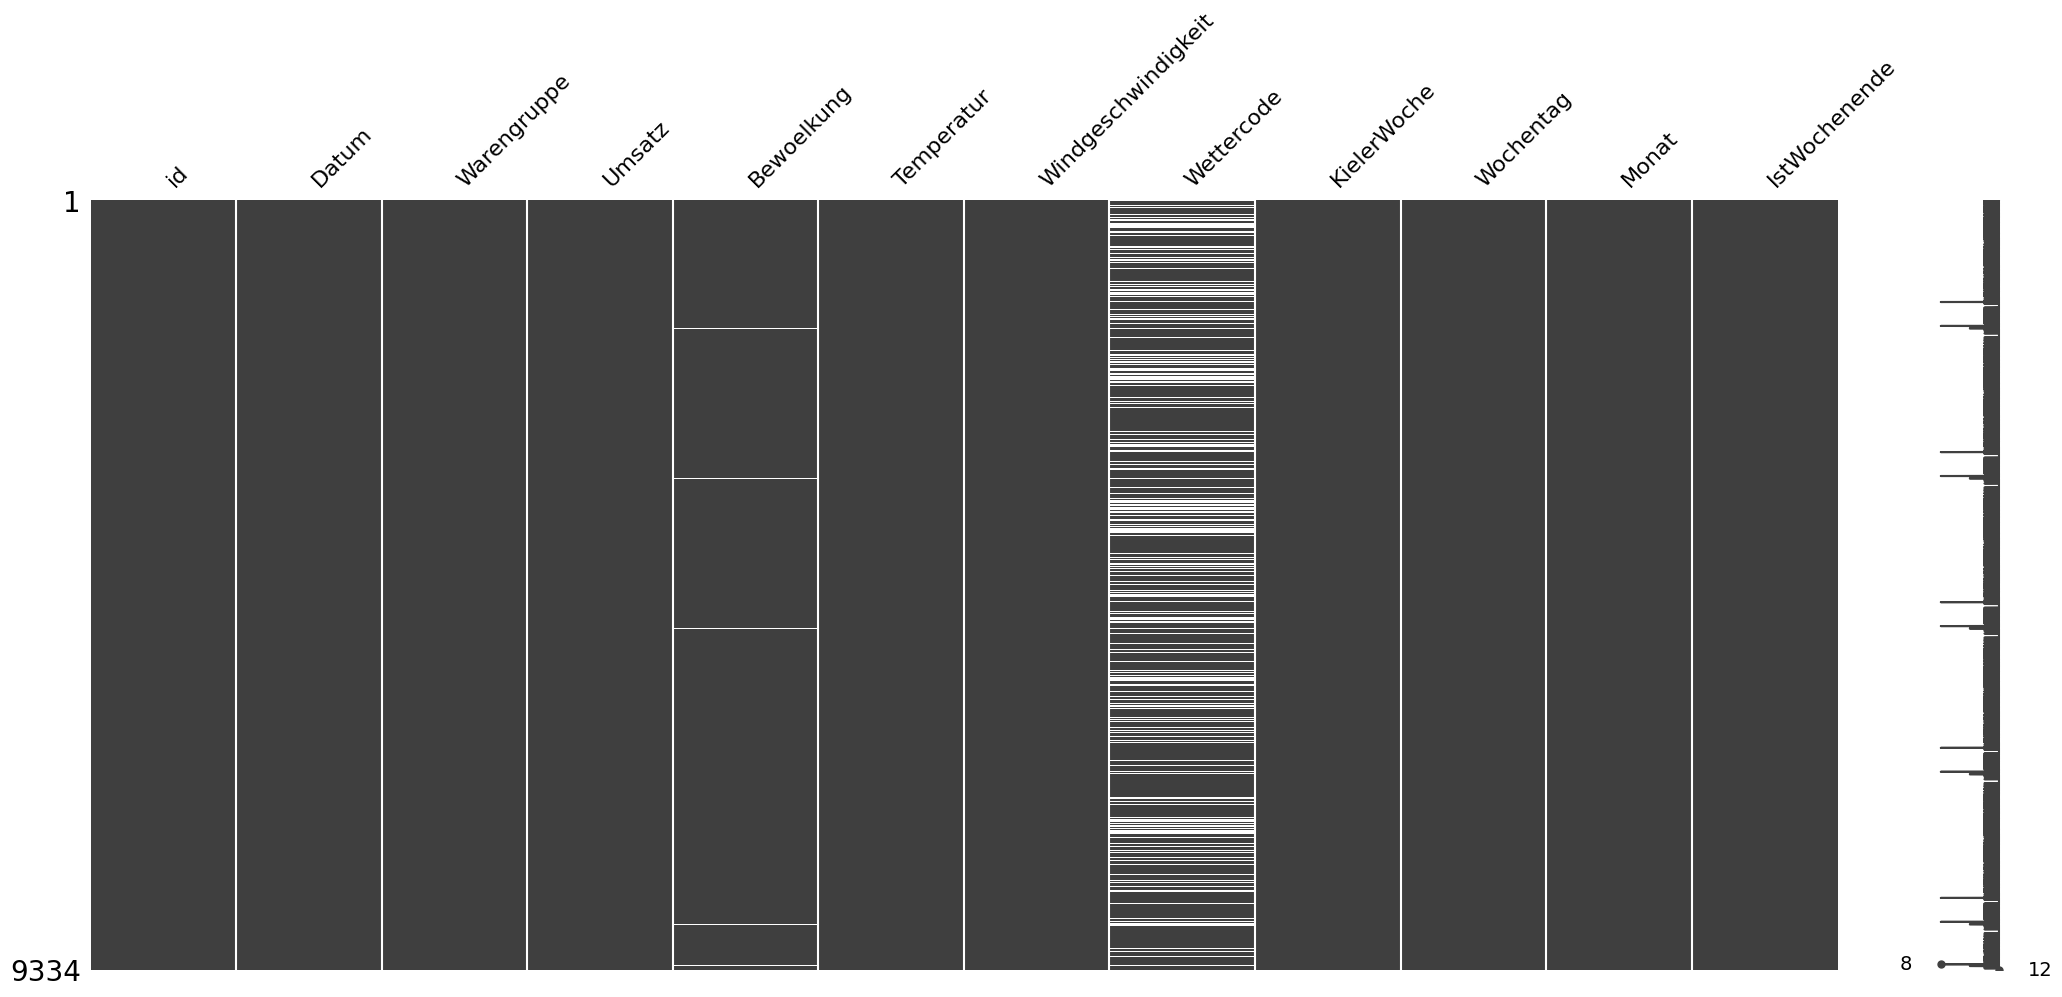

In [3]:
# Visualisierung
msno.matrix(df)
plt.show()

In [4]:
# Imputation
df['Wettercode'] = df['Wettercode'].fillna(-1).astype(int)
df['Temperatur'] = df['Temperatur'].fillna(df['Temperatur'].median())
df['Bewoelkung'] = df['Bewoelkung'].fillna(df['Bewoelkung'].median())
df['Windgeschwindigkeit'] = df['Windgeschwindigkeit'].fillna(df['Windgeschwindigkeit'].median())

In [5]:
# Kontrolle
df.isnull().sum()

id                     0
Datum                  0
Warengruppe            0
Umsatz                 0
Bewoelkung             0
Temperatur             0
Windgeschwindigkeit    0
Wettercode             0
KielerWoche            0
Wochentag              0
Monat                  0
IstWochenende          0
dtype: int64